In [1]:
import pandas as pd
from scipy.stats import zscore

In [4]:
df = pd.read_csv('../dataset/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
wight_mean = df['Weight'].mean()
wight_std = df['Weight'].std()
height_mean = df['Height'].mean()
height_std = df['Height'].std()

In [6]:
df['Weight_zscore'] = (df['Weight'] - wight_mean) / wight_std
df['Height_zscore'] = (df['Height'] - height_mean) / height_std
df

,Gender,Height,Weight,Weight_zscore,Height_zscore
0,Male,73.847017,241.893563,2.505672,1.943964
1,Male,68.781904,162.310473,0.027099,0.627505
2,Male,74.110105,212.740856,1.597726,2.012343
3,Male,71.730978,220.042470,1.825131,1.393991
4,Male,69.881796,206.349801,1.398680,0.913375
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.768113,-0.050658
9996,Female,67.067155,170.867906,0.293616,0.181830
9997,Female,63.867992,128.475319,-1.026678,-0.649655
9998,Female,69.034243,163.852461,0.075124,0.693090


In [8]:
print(f"Mean of weight: {wight_mean:.2f}")
print(f"Standard Deviation of weight: {wight_std:.2f}")
print(f"Mean of height: {height_mean:.2f}")
print(f"Standard Deviation of height: {height_std:.2f}")

Mean of weight: 161.44
Standard Deviation of weight: 32.11
Mean of height: 66.37
Standard Deviation of height: 3.85


#### Outlier analysis

In [9]:
zscore_threshold = 3
outliers_weight = df[abs(df['Weight_zscore']) > zscore_threshold]
outliers_height = df[abs(df['Height_zscore']) > zscore_threshold]

In [10]:
outliers_height

,Gender,Height,Weight,Weight_zscore,Height_zscore
994,Male,78.095867,255.690835,2.935380,3.048271
1317,Male,78.462053,227.342565,2.052489,3.143445
2014,Male,78.998742,269.989699,3.380711,3.282934
3285,Male,78.528210,253.889004,2.879263,3.160640
3757,Male,78.621374,245.733783,2.625273,3.184854
6624,Female,54.616858,71.393749,-2.804453,-3.054091
9285,Female,54.263133,64.700127,-3.012922,-3.146027


In [11]:
outliers_weight

,Gender,Height,Weight,Weight_zscore,Height_zscore
2014,Male,78.998742,269.989699,3.380711,3.282934
9285,Female,54.263133,64.700127,-3.012922,-3.146027


In [12]:
all_outliers = pd.concat([outliers_weight, outliers_height]).drop_duplicates()
all_outliers

,Gender,Height,Weight,Weight_zscore,Height_zscore
2014,Male,78.998742,269.989699,3.380711,3.282934
9285,Female,54.263133,64.700127,-3.012922,-3.146027
994,Male,78.095867,255.690835,2.935380,3.048271
1317,Male,78.462053,227.342565,2.052489,3.143445
3285,Male,78.528210,253.889004,2.879263,3.160640
3757,Male,78.621374,245.733783,2.625273,3.184854
6624,Female,54.616858,71.393749,-2.804453,-3.054091


In [13]:
print(f"Number of weight outliers (z score > {zscore_threshold}): {len(outliers_weight)}")
print(f"Number of height outliers (z score > {zscore_threshold}): {len(outliers_height)}")
print(f"Total number of unique outliers: {len(all_outliers)}")

Number of weight outliers (z score > 3): 2
Number of height outliers (z score > 3): 7
Total number of unique outliers: 7


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

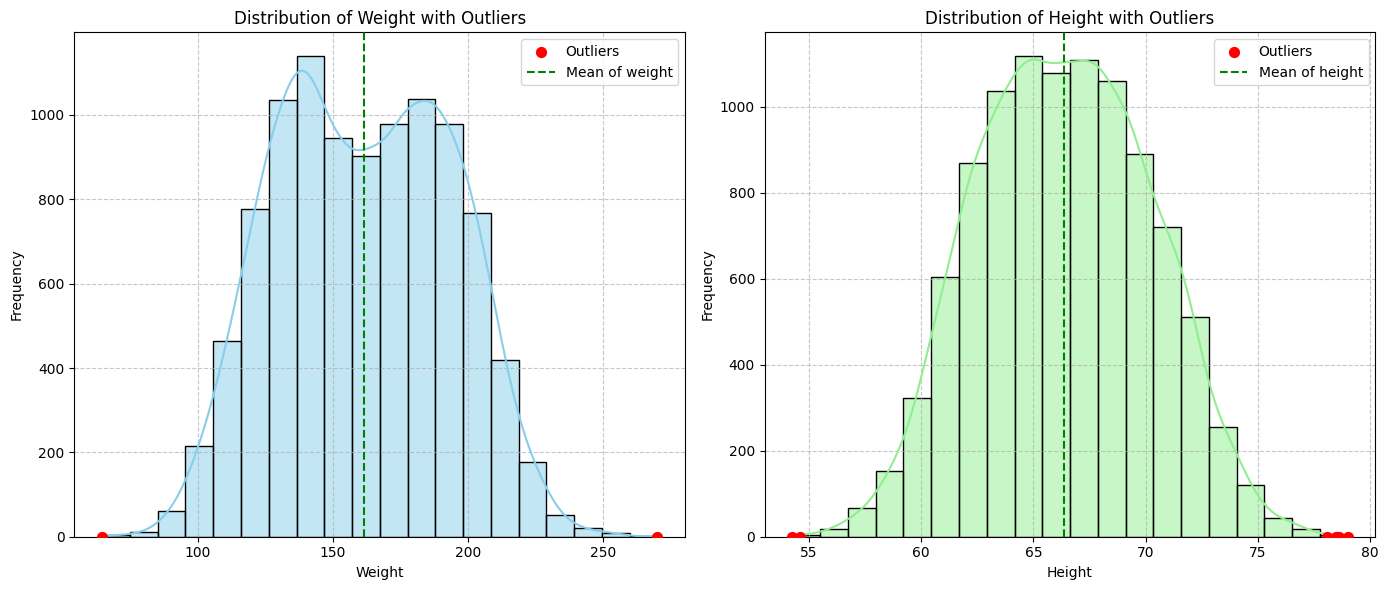

In [32]:
plt.figure(figsize=(14, 6))
# Plot for Weight
plt.subplot(1, 2, 1)
sns.histplot(df['Weight'], kde=True, color='skyblue', bins=20)
plt.scatter(outliers_weight['Weight'], [0]*len(outliers_weight), color='red', label='Outliers', s=50, zorder=5)
plt.axvline(wight_mean, color='green', linestyle='--', label='Mean of weight', zorder=10)
plt.title('Distribution of Weight with Outliers')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for Height
plt.subplot(1, 2, 2)
sns.histplot(df['Height'], kde=True, color='lightgreen', bins=20)
plt.scatter(outliers_height['Height'], [0]*len(outliers_height), color='red', label='Outliers', s=50, zorder=5)
plt.axvline(height_mean, color='green', linestyle='--', label='Mean of height', zorder=10)
plt.title('Distribution of Height with Outliers')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Scatter plot for Height vs Weight with outliers highlighted

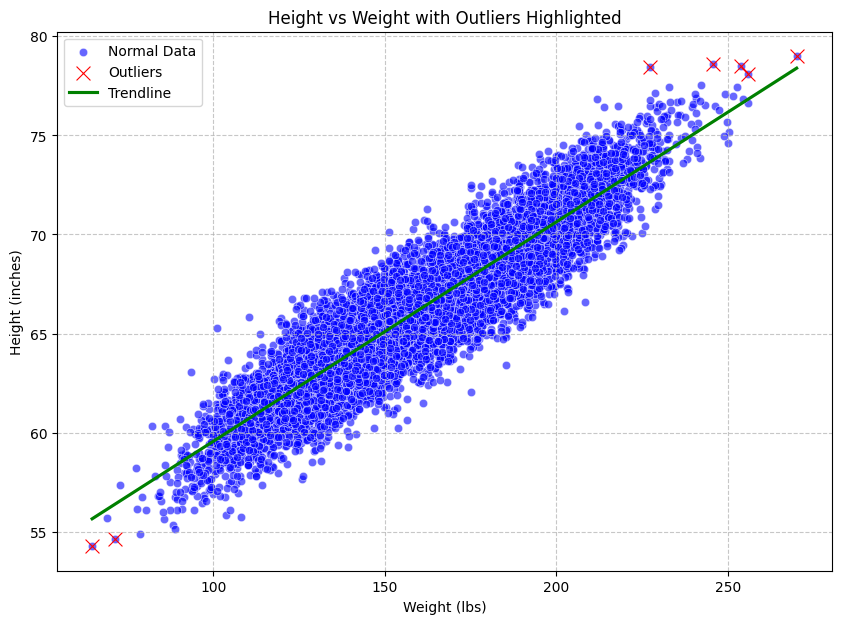

In [43]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Weight', y='Height', label='Normal Data', alpha=0.6, color='blue')
sns.scatterplot(data=all_outliers, x='Weight', y='Height', label='Outliers', color='red', s=100, marker='x')
# add a trendline
sns.regplot(data=df, x='Weight', y='Height', scatter=False, color='green', label='Trendline')
plt.title('Height vs Weight with Outliers Highlighted')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (inches)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Box plot for weight

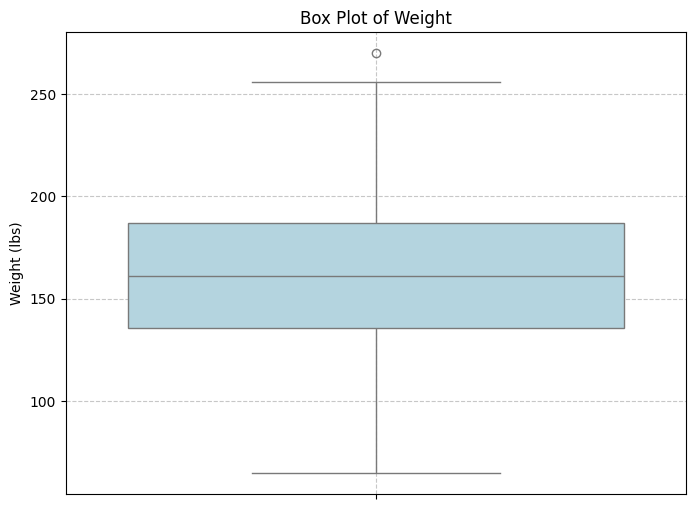

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Weight'], color='lightblue')
plt.title('Box Plot of Weight')
plt.ylabel('Weight (lbs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Box plot for height

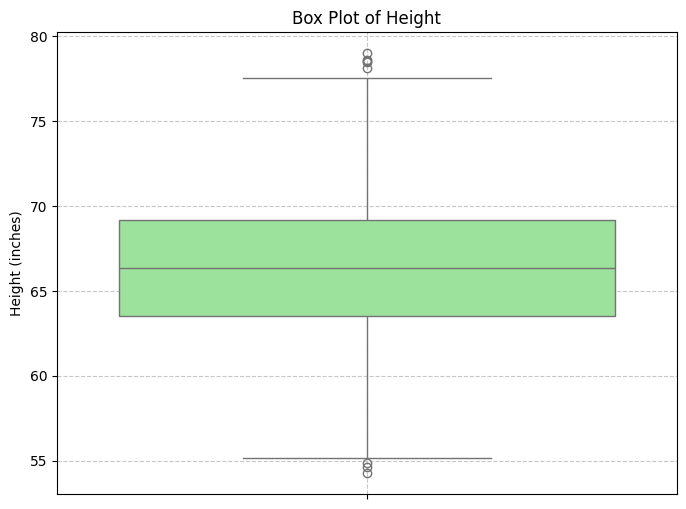

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Height'], color='lightgreen')
plt.title('Box Plot of Height')
plt.ylabel('Height (inches)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()